In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from pdebench.models.fno.utils import FNODatasetSingle
import xarray as xr
import pandas as pd
from tqdm import tqdm
from torchvision.datasets.utils import download_url

/home/chris/anaconda3/envs/pfno/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "data/DarcyFlow/processed/"
files = os.listdir(path)
dataset = xr.open_dataset(path + files[0])
print(files[0])

DarcyFlow_beta1.0_train.nc


In [27]:
dataset

<xarray.Dataset> Size: 1GB
Dimensions:       (samples: 9000, x: 128, y: 128, t: 1)
Dimensions without coordinates: samples, x, y, t
Data variables:
    a             (samples, x, y) float32 590MB ...
    u             (samples, t, x, y) float32 590MB ...
    x-coordinate  (x) float32 512B ...
    y-coordinate  (x) float32 512B ...
Attributes:
    beta:     1.0

In [25]:
x = dataset["x-coordinate"][::2]
grid = np.stack(np.meshgrid(x,x))
grid.shape

(2, 64, 64)

# Visualize samples

In [8]:
samples = np.random.randint(0,9000,5)
x = dataset["x-coordinate"]
y = dataset["y-coordinate"]

In [9]:
dataset["a"][0].max()

<xarray.DataArray 'a' ()> Size: 8B
array(1.)

Text(0, 0.5, 'Darcy flow solution')

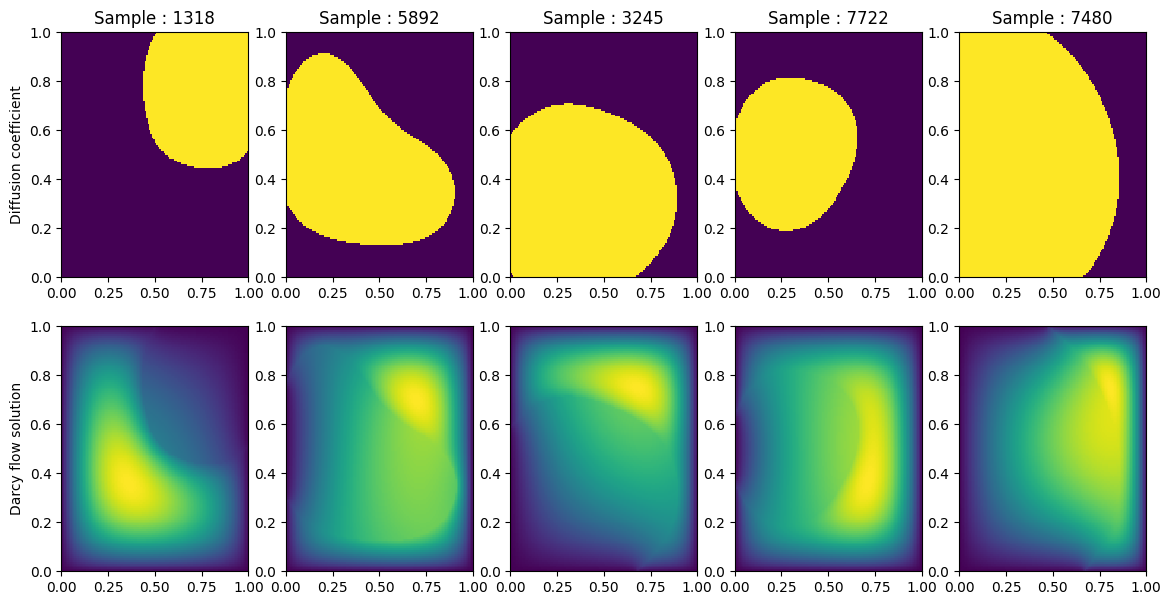

In [10]:
fig, axs = plt.subplots(2, 5, figsize=(14, 7))
for s, sample in enumerate(samples):
    axs[0,s].pcolormesh(x, y, dataset["a"][sample])
    axs[1,s].pcolormesh(x, y, dataset["u"][sample,0])
    axs[0,s].set_title(f"Sample : {sample}")
axs[0, 0].set_ylabel(f"Diffusion coefficient")
axs[1, 0].set_ylabel(f"Darcy flow solution")

In [8]:
flnm = '2D_DarcyFlow_beta0.1_Train.hdf5'

# Initialize the dataset and datalo
train_data = FNODatasetSingle(flnm,
                              saved_folder="data/Darcy Flow/")

val_data = FNODatasetSingle(flnm,
                            saved_folder = "data/Darcy Flow/",
                            if_test=True)

.HDF5 file extension is assumed hereafter
.HDF5 file extension is assumed hereafter


In [13]:
d1, d2, grid = train_data.__getitem__(0)

d1.shape

torch.Size([128, 128, 2, 1])